# Pandas
---

Это краткое введение в pandas, ориентированное в основном на новых пользователей.  
[Туториал по более продвинутому использованию pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook.)  
По остальным вопросам рекомендуется обращаться к [официальной документации](https://pandas.pydata.org/pandas-docs/stable/index.html)

---

# Содержание 

* [Создание объектов](#Создание-объектов)

* [Просмотр данных](#Просмотр-данных)

* [Выбор данных](#Выбор-данных)

* [Присваивание значений](#Присваивание-значений)

* [Отсутствующие данные](#Отсутствующие-данные)

* [Операции с DataFrame](#Операции-с-DataFrame)
    * [Stats](#Stats)
    * [Apply](#Apply)
    * [Гистограмма](#Гистограмма)
    * [Строковые методы](#Строковые-методы)
    
* [Объединение](#Объединение)
    * [Concat](#Concat)
    * [Join](#Join)
    * [Grouping](#Grouping)
    
* [Изменение формы](#Изменение-формы)
    * [Stack](#Stack)
    * [Сводные таблицы](#Сводные-таблицы)
    
* [Временные ряды](#Временные-ряды)

* [Категории](#Категории)

* [Построение графиков](#Построение-графиков)

* [Запись в файл / чтение из файла](#Запись-в-файл-/-чтение-из-файла)
    * [CSV](#CSV)
    * [HDF5](#HDF5)
    * [Excel](#Excel)

---

## Создание объектов
---

Создание [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) путем передачи списка значений. В таком случае pandas создавает целочисленный индекс по умолчанию:

In [4]:
import pandas as pd
import numpy as np

In [5]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

---
Создание [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) путем передачи массива NumPy с индексом datetime и именованными столбцами:

In [6]:
dates = pd.date_range("20130101", periods=6)

dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

df

,A,B,C,D
2013-01-01,0.930724,1.327422,-0.289486,-0.463169
2013-01-02,-0.380228,0.502977,0.868925,0.179879
2013-01-03,-0.425828,1.202649,-0.609449,0.332192
2013-01-04,-1.113482,0.179261,0.572977,-0.597010
2013-01-05,-1.091683,0.997989,-0.501027,-0.059156
2013-01-06,0.223100,-0.992536,1.437341,-0.915390


---
Создание [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) путем передачи dict, который можно преобразовать в Series.

In [9]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
     }
 )

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


---
Столбцы результирующего [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) имеют разные типы.

In [14]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

---
>Подробнее см. [Data Structure Intro section](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dsintro)

---

## Просмотр данных
---

Отображение верхних и нижних рядов структуры:

In [15]:
import pandas as pd
import numpy as np

In [16]:
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

In [20]:
df.head()

,A,B,C,D
2013-01-01,-0.675700,1.784232,1.347938,-0.672681
2013-01-02,0.125845,-0.260852,-0.983858,1.196859
2013-01-03,-0.347670,-0.512815,-0.481715,0.621319
2013-01-04,-0.544341,0.384851,1.006482,-0.870686
2013-01-05,1.353347,0.354844,-0.507729,-0.197182


In [18]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.544341,0.384851,1.006482,-0.870686
2013-01-05,1.353347,0.354844,-0.507729,-0.197182
2013-01-06,1.000002,-0.643633,0.287983,0.770089


---
Отображение индексов, столбцов:

In [21]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [22]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

---
[DataFrame.to_numpy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) возвращает представление данных в NumPy массиве. Обратите внимание, что это может быть дорогостоящей операцией, когда ваш DataFrame имеет столбцы с разными типами данных, что сводится к фундаментальному различию между pandas и NumPy: массивы NumPy имеют один тип для всего массива, а pandas DataFrames имеют один тип на столбец. Когда вы вызываете [DataFrame.to_numpy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy), pandas найдет dtype NumPy, который может содержать все dtypes в DataFrame. Это может оказаться таблицей, что требует приведения каждого значения к типу object.

In [23]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
     }
 )

In [24]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

---
[describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) показывает краткую статистическую сводку ваших данных:

In [25]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.151914,0.184438,0.111517,0.141286
std,0.846484,0.894281,0.926939,0.841576
min,-0.675700,-0.643633,-0.983858,-0.870686
25%,-0.495173,-0.449824,-0.501225,-0.553806
50%,-0.110912,0.046996,-0.096866,0.212068
75%,0.781463,0.377349,0.826857,0.732897
max,1.353347,1.784232,1.347938,1.196859


---
Транспонирование:

In [26]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.675700,0.125845,-0.347670,-0.544341,1.353347,1.000002
B,1.784232,-0.260852,-0.512815,0.384851,0.354844,-0.643633
C,1.347938,-0.983858,-0.481715,1.006482,-0.507729,0.287983
D,-0.672681,1.196859,0.621319,-0.870686,-0.197182,0.770089


---
Сортировка по оси:

In [34]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.672681,1.347938,1.784232,-0.675700
2013-01-02,1.196859,-0.983858,-0.260852,0.125845
2013-01-03,0.621319,-0.481715,-0.512815,-0.347670
2013-01-04,-0.870686,1.006482,0.384851,-0.544341
2013-01-05,-0.197182,-0.507729,0.354844,1.353347
2013-01-06,0.770089,0.287983,-0.643633,1.000002


---
Сортировка по значениям:

In [35]:
df.sort_values(by="B")

,A,B,C,D
2013-01-06,1.000002,-0.643633,0.287983,0.770089
2013-01-03,-0.347670,-0.512815,-0.481715,0.621319
2013-01-02,0.125845,-0.260852,-0.983858,1.196859
2013-01-05,1.353347,0.354844,-0.507729,-0.197182
2013-01-04,-0.544341,0.384851,1.006482,-0.870686
2013-01-01,-0.675700,1.784232,1.347938,-0.672681


---
>Подробнее см. [Basics section](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics)

---

## Выбор данных
---

Выбор одного столбца, который дает Series, эквивалентный df.A:

In [36]:
import pandas as pd
import numpy as np

In [56]:
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

In [57]:
df["A"]

2013-01-01   -0.972345
2013-01-02   -2.150302
2013-01-03   -1.043934
2013-01-04   -0.532943
2013-01-05   -0.070717
2013-01-06   -0.288001
Freq: D, Name: A, dtype: float64

---
Использование среза:

In [58]:
df[0:3]

,A,B,C,D
2013-01-01,-0.972345,-1.002137,0.462610,-0.507919
2013-01-02,-2.150302,1.532121,0.282263,1.863421
2013-01-03,-1.043934,0.027366,0.429990,-0.862321


In [59]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-2.150302,1.532121,0.282263,1.863421
2013-01-03,-1.043934,0.027366,0.429990,-0.862321
2013-01-04,-0.532943,0.824139,1.137875,0.122524


---
Получение строки DataFrame:

In [60]:
df.loc[dates[0]]

A   -0.972345
B   -1.002137
C    0.462610
D   -0.507919
Name: 2013-01-01 00:00:00, dtype: float64

---
Выбор по нескольким осям:

In [61]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.972345,-1.002137
2013-01-02,-2.150302,1.532121
2013-01-03,-1.043934,0.027366
2013-01-04,-0.532943,0.824139
2013-01-05,-0.070717,0.118235
2013-01-06,-0.288001,-1.670127


In [62]:
df.loc["20130102", ["A", "B"]]

A   -2.150302
B    1.532121
Name: 2013-01-02 00:00:00, dtype: float64

---
Получение значения в ячейке:

In [63]:
df.loc[dates[0], "A"]

-0.9723450491087825

---
Для получения значения (аналогично примеру выше, но работает быстрее)

In [64]:
df.at[dates[0], "A"]

-0.9723450491087825

---
Получение строки по номеру

In [65]:
df.iloc[2]

A   -1.043934
B    0.027366
C    0.429990
D   -0.862321
Name: 2013-01-03 00:00:00, dtype: float64

---
По целочисленным срезам, аналогично NumPy / Python:

In [66]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.532943,0.824139
2013-01-05,-0.070717,0.118235


In [67]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-2.150302,1.532121,0.282263,1.863421
2013-01-03,-1.043934,0.027366,0.429990,-0.862321


In [68]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-1.002137,0.462610
2013-01-02,1.532121,0.282263
2013-01-03,0.027366,0.429990
2013-01-04,0.824139,1.137875
2013-01-05,0.118235,0.699868
2013-01-06,-1.670127,-0.403404


---
Получение значения в ячейке:

In [70]:
df.iloc[1, 1]

1.532121240195446

---
То же самое, но быстрее:

In [71]:
df.iat[1, 1]

1.532121240195446

---
Выбор данных по условию:

In [74]:
df[df["A"] > -0.5]

,A,B,C,D
2013-01-05,-0.070717,0.118235,0.699868,2.265152
2013-01-06,-0.288001,-1.670127,-0.403404,-0.454997


In [75]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,0.462610,NaN
2013-01-02,NaN,1.532121,0.282263,1.863421
2013-01-03,NaN,0.027366,0.429990,NaN
2013-01-04,NaN,0.824139,1.137875,0.122524
2013-01-05,NaN,0.118235,0.699868,2.265152
2013-01-06,NaN,NaN,NaN,NaN


---
Использование метода [isin()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html#pandas.Series.isin) для фильтрации:

In [76]:
df2 = df.copy()

In [77]:
df2["E"] = ["one", "one", "two", "three", "four", "three"]

In [78]:
df2

,A,B,C,D,E
2013-01-01,-0.972345,-1.002137,0.462610,-0.507919,one
2013-01-02,-2.150302,1.532121,0.282263,1.863421,one
2013-01-03,-1.043934,0.027366,0.429990,-0.862321,two
2013-01-04,-0.532943,0.824139,1.137875,0.122524,three
2013-01-05,-0.070717,0.118235,0.699868,2.265152,four
2013-01-06,-0.288001,-1.670127,-0.403404,-0.454997,three


In [79]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-1.043934,0.027366,0.429990,-0.862321,two
2013-01-05,-0.070717,0.118235,0.699868,2.265152,four


---
>Подбробнее см. [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing), [MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced), [Selection by Label](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label), [Selection by Position](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-integer)

---

## Присваивание значений
---

Установка нового столбца автоматически выравнивает данные по индексам:

In [80]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))

s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [81]:
df["F"] = s1

In [82]:
df

,A,B,C,D,F
2013-01-01,-0.972345,-1.002137,0.462610,-0.507919,NaN
2013-01-02,-2.150302,1.532121,0.282263,1.863421,1.0
2013-01-03,-1.043934,0.027366,0.429990,-0.862321,2.0
2013-01-04,-0.532943,0.824139,1.137875,0.122524,3.0
2013-01-05,-0.070717,0.118235,0.699868,2.265152,4.0
2013-01-06,-0.288001,-1.670127,-0.403404,-0.454997,5.0


---
Присваивание значения по нзаванию столбца:

In [83]:
df.at[dates[0], "A"] = 0

In [84]:
df

,A,B,C,D,F
2013-01-01,0.000000,-1.002137,0.462610,-0.507919,NaN
2013-01-02,-2.150302,1.532121,0.282263,1.863421,1.0
2013-01-03,-1.043934,0.027366,0.429990,-0.862321,2.0
2013-01-04,-0.532943,0.824139,1.137875,0.122524,3.0
2013-01-05,-0.070717,0.118235,0.699868,2.265152,4.0
2013-01-06,-0.288001,-1.670127,-0.403404,-0.454997,5.0


---
По позиции:

In [85]:
df.iat[0, 1] = 0

In [86]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.462610,-0.507919,NaN
2013-01-02,-2.150302,1.532121,0.282263,1.863421,1.0
2013-01-03,-1.043934,0.027366,0.429990,-0.862321,2.0
2013-01-04,-0.532943,0.824139,1.137875,0.122524,3.0
2013-01-05,-0.070717,0.118235,0.699868,2.265152,4.0
2013-01-06,-0.288001,-1.670127,-0.403404,-0.454997,5.0


---
Присваивание значений в виде NumPy массива:

In [87]:
df.loc[:, "D"] = np.array([5] * len(df))

In [88]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.462610,5,NaN
2013-01-02,-2.150302,1.532121,0.282263,5,1.0
2013-01-03,-1.043934,0.027366,0.429990,5,2.0
2013-01-04,-0.532943,0.824139,1.137875,5,3.0
2013-01-05,-0.070717,0.118235,0.699868,5,4.0
2013-01-06,-0.288001,-1.670127,-0.403404,5,5.0


---
Замена значений с использованием условия:

In [90]:
df2 = df.copy()
df2[df2 > 0] = -df2

In [91]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.462610,-5,NaN
2013-01-02,-2.150302,-1.532121,-0.282263,-5,-1.0
2013-01-03,-1.043934,-0.027366,-0.429990,-5,-2.0
2013-01-04,-0.532943,-0.824139,-1.137875,-5,-3.0
2013-01-05,-0.070717,-0.118235,-0.699868,-5,-4.0
2013-01-06,-0.288001,-1.670127,-0.403404,-5,-5.0


---
## Отсутствующие данные
---

pandas в основном использует значение np.nan для представления отсутствующих данных. По умолчанию оно пропускается в вычислениях.

Переиндексирование позволяет вам изменить / добавить / удалить индекс на указанной оси. Эта операция возвращает копию данных.

In [93]:
import pandas as pd
import numpy as np

In [94]:
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

In [95]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

In [99]:
df1.loc[dates[0]:dates[1], "E"] = 1

In [100]:
df1

,A,B,C,D,E
2013-01-01,-0.006902,-1.524659,0.835695,0.431218,1.0
2013-01-02,0.941004,-0.670430,0.225466,-0.670032,1.0
2013-01-03,0.394686,1.366774,0.176086,-0.729037,NaN
2013-01-04,0.973640,1.376656,-0.891866,0.924329,NaN


---
Удаление строк, в которых отсутствуют данные:

In [101]:
df1.dropna(how="any")

,A,B,C,D,E
2013-01-01,-0.006902,-1.524659,0.835695,0.431218,1.0
2013-01-02,0.941004,-0.670430,0.225466,-0.670032,1.0


---
Заполнение отсутствующих данных:

In [102]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.006902,-1.524659,0.835695,0.431218,1.0
2013-01-02,0.941004,-0.670430,0.225466,-0.670032,1.0
2013-01-03,0.394686,1.366774,0.176086,-0.729037,5.0
2013-01-04,0.973640,1.376656,-0.891866,0.924329,5.0


---
Получение таблицы с булевыми значениями, True - если в ячейке nan

In [103]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


---
>Подробнее см. [Missing Data section](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data)

---

## Операции с DataFrame
---



In [104]:
import pandas as pd
import numpy as np

In [111]:
dates = pd.date_range("20130101", periods=6)

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

df

,A,B,C,D
2013-01-01,-0.707274,-0.027982,-0.498755,1.024683
2013-01-02,0.265856,-0.065437,-1.009833,-1.482791
2013-01-03,-1.359884,-0.491711,-0.659229,-0.065801
2013-01-04,-0.240112,-0.075881,-1.430684,-0.787763
2013-01-05,-1.394030,-1.602543,-0.348359,-0.180873
2013-01-06,2.032310,0.748764,2.878344,0.620928


### Stats
---

Вычисление среднего значения по столбцам:

In [113]:
df.mean()

A   -0.233856
B   -0.252465
C   -0.178086
D   -0.145270
dtype: float64

---
По строкам (по 1 оси): 

In [114]:
df.mean(1)

2013-01-01   -0.052332
2013-01-02   -0.573051
2013-01-03   -0.644156
2013-01-04   -0.633610
2013-01-05   -0.881451
2013-01-06    1.570086
Freq: D, dtype: float64

---
Работа с объектами разной размерности, требующими выравнивания:

In [115]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [116]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [117]:
df.sub(s, axis="index")

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-2.359884,-1.491711,-1.659229,-1.065801
2013-01-04,-3.240112,-3.075881,-4.430684,-3.787763
2013-01-05,-6.394030,-6.602543,-5.348359,-5.180873
2013-01-06,NaN,NaN,NaN,NaN


---
### Apply
---

Применение функции к DataFrame:

In [119]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,-0.707274,-0.027982,-0.498755,1.024683
2013-01-02,-0.441419,-0.093419,-1.508588,-0.458107
2013-01-03,-1.801303,-0.585130,-2.167816,-0.523908
2013-01-04,-2.041415,-0.661011,-3.598500,-1.311672
2013-01-05,-3.435444,-2.263554,-3.946859,-1.492545
2013-01-06,-1.403134,-1.514790,-1.068515,-0.871617


In [128]:
df.apply(lambda x: x.max() - x.min())

A    3.426340
B    2.351307
C    4.309028
D    2.507474
dtype: float64

---
### Гистограмма
---

Получение данных для гистограммы:

In [155]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [156]:
s

0    5
1    0
2    5
3    0
4    3
5    6
6    3
7    4
8    1
9    4
dtype: int32

In [157]:
s.value_counts()

0    2
3    2
4    2
5    2
1    1
6    1
dtype: int64

---
### Строковые методы
---

Series имеет методы обработки строк в атрибуте str, которые упрощают работу с каждым элементом массива, как показано в фрагменте кода ниже. Обратите внимание, что сопоставление с образцом в str обычно использует регулярные выражения по умолчанию (а в некоторых случаях всегда использует их).

In [158]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

In [159]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

>Подробнее см. [ Vectorized String Methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-string-methods)

---

## Объединение
---

pandas предоставляет различные средства для простого объединения вместе объектов Series и DataFrame с различными видами логики набора для индексов и функциональных возможностей реляционной алгебры в случае операций типа соединения / слияния.

Больше про объединение датафреймов: [Merging section](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merge-join-concatenate-and-compare)

In [2]:
import pandas as pd
import numpy as np

---
### Concat
---

Объединение объектов pandas с помощью [concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html#pandas.concat):

In [3]:
df = pd.DataFrame(np.random.randn(10, 4))

In [4]:
df

,0,1,2,3
0,-0.724007,-0.519628,-0.812785,-1.399110
1,1.139325,-0.998840,-0.977161,1.909013
2,0.835671,-0.879394,0.878888,0.618439
3,-0.371179,-0.506637,0.161615,1.684531
4,0.668355,0.011017,-1.085642,1.564787
5,-0.181447,0.098971,-0.015533,0.629612
6,-0.852985,0.771681,-0.260991,0.608421
7,-0.163464,0.826223,-1.347934,1.015013
8,-1.000513,-0.673336,0.484656,-1.079660
9,-0.328420,-1.610095,1.572312,-0.791073


In [5]:
# разбиение df на части
pieces = [df[:3], df[3:7], df[7:]]

In [6]:
pieces

[          0         1         2         3
 0 -0.724007 -0.519628 -0.812785 -1.399110
 1  1.139325 -0.998840 -0.977161  1.909013
 2  0.835671 -0.879394  0.878888  0.618439,
           0         1         2         3
 3 -0.371179 -0.506637  0.161615  1.684531
 4  0.668355  0.011017 -1.085642  1.564787
 5 -0.181447  0.098971 -0.015533  0.629612
 6 -0.852985  0.771681 -0.260991  0.608421,
           0         1         2         3
 7 -0.163464  0.826223 -1.347934  1.015013
 8 -1.000513 -0.673336  0.484656 -1.079660
 9 -0.328420 -1.610095  1.572312 -0.791073]

In [7]:
pd.concat(pieces)

,0,1,2,3
0,-0.724007,-0.519628,-0.812785,-1.399110
1,1.139325,-0.998840,-0.977161,1.909013
2,0.835671,-0.879394,0.878888,0.618439
3,-0.371179,-0.506637,0.161615,1.684531
4,0.668355,0.011017,-1.085642,1.564787
5,-0.181447,0.098971,-0.015533,0.629612
6,-0.852985,0.771681,-0.260991,0.608421
7,-0.163464,0.826223,-1.347934,1.015013
8,-1.000513,-0.673336,0.484656,-1.079660
9,-0.328420,-1.610095,1.572312,-0.791073


---
>Добавление столбца в [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas-dataframe) выполняется относительно быстро. Однако для добавления строки требуется копия, и эта операция может быть дорогой по времени и памяти. Рекомендуется передавать предварительно созданный список в конструктор DataFrame вместо создания DataFrame путем итеративного добавления к нему строк. Дополнительную информацию см. в разделе [Appending to dataframe](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#concatenating-using-append).

---

### Join
---

SQL стиль объединения

In [8]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

In [9]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [10]:
left

,key,lval
0,foo,1
1,foo,2


In [11]:
right

,key,rval
0,foo,4
1,foo,5


In [12]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


---
Ещё один пример:

In [23]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

In [24]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [25]:
left

,key,lval
0,foo,1
1,bar,2


In [26]:
right

,key,rval
0,foo,4
1,bar,5


In [29]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


---
>Подробнее см. [Database style joining](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging)

---

### Grouping
---

Под «группировкой по» подразумевается процесс, включающий один или несколько из следующих шагов:

* Разделение данных на группы по некоторым критериям

* Независимое применение функции к каждой группе

* Объединение результатов в структуру данных

In [40]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "egg"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

In [41]:
df

,A,B,C,D
0,foo,one,0.262416,-0.061747
1,bar,one,-1.445088,-0.122259
2,foo,two,0.948183,-1.974310
3,bar,three,-1.186090,0.046279
4,foo,two,-0.780385,0.346648
5,bar,two,-0.591186,-1.454223
6,foo,one,2.234441,0.386148
7,egg,three,-0.648718,-0.528632


---
Группировка, а затем применение функции [sum()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.sum.html#pandas.core.groupby.GroupBy.sum) к полученным группам.

In [42]:
df.groupby("A").sum()

,C,D
A,,
bar,-3.222365,-1.530204
egg,-0.648718,-0.528632
foo,2.664655,-1.303262


---
Группировка по нескольким столбцам образует мультииндекс, и мы можем применить функцию [sum()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.sum.html#pandas.core.groupby.GroupBy.sum).

In [43]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -1.445088 -0.122259
    three -1.186090  0.046279
    two   -0.591186 -1.454223
egg three -0.648718 -0.528632
foo one    2.496857  0.324400
    two    0.167798 -1.627662

---
>Подробнее см. [Grouping section](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#group-by-split-apply-combine)

---

## Изменение формы
---

In [65]:
import pandas as pd

### Stack
---

In [47]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)

In [48]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [49]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

In [50]:
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [51]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [52]:
df

A         B
first second                    
bar   one    -1.286855  1.368178
      two     0.614731 -0.556479
baz   one    -0.261217  0.008650
      two     1.149283  2.011324
foo   one     0.969675 -1.063819
      two     0.782814  0.946447
qux   one    -0.205439 -0.466576
      two     2.321981 -0.982052

In [53]:
df2 = df[:4]

In [54]:
df2

A         B
first second                    
bar   one    -1.286855  1.368178
      two     0.614731 -0.556479
baz   one    -0.261217  0.008650
      two     1.149283  2.011324

---
Метод [stack()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html#pandas-dataframe-stack) «сжимает» уровень в столбцах DataFrame.

In [55]:
stacked = df2.stack()

In [56]:
stacked

first  second   
bar    one     A   -1.286855
               B    1.368178
       two     A    0.614731
               B   -0.556479
baz    one     A   -0.261217
               B    0.008650
       two     A    1.149283
               B    2.011324
dtype: float64

---
С «сложенными» DataFrame или Series (имеющими MultiIndex в качестве индекса) обратная операция [unstack()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), которая по умолчанию распаковывает последний уровень:

In [57]:
stacked.unstack()

A         B
first second                    
bar   one    -1.286855  1.368178
      two     0.614731 -0.556479
baz   one    -0.261217  0.008650
      two     1.149283  2.011324

In [58]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.286855  0.614731
      B  1.368178 -0.556479
baz   A -0.261217  1.149283
      B  0.008650  2.011324

In [59]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.286855 -0.261217
       B  1.368178  0.008650
two    A  0.614731  1.149283
       B -0.556479  2.011324

---
>См. [Hierarchical Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-hierarchical) и [Reshaping](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-by-stacking-and-unstacking).

---

### Сводные таблицы
---



In [60]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

df

In [62]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.953106 -1.161205
      B -0.146288  0.840871
      C -0.353628  0.906174
three A  1.622199       NaN
      B       NaN -0.580861
      C  0.658588       NaN
two   A       NaN -1.148627
      B  1.080043       NaN
      C       NaN  0.417662

---
>Подробнее см. [Pivot tables](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#pivot-tables)

---

## Временные ряды
---

pandas имеет простые, мощные и эффективные функции для выполнения операций преобразования частоты (например, преобразования секундных данных в 5-минутные данные).

In [66]:
import pandas as pd

In [67]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")

In [68]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [69]:
ts

2012-01-01 00:00:00    385
2012-01-01 00:00:01    424
2012-01-01 00:00:02    444
2012-01-01 00:00:03    474
2012-01-01 00:00:04    280
                      ... 
2012-01-01 00:01:35    292
2012-01-01 00:01:36    276
2012-01-01 00:01:37    192
2012-01-01 00:01:38     38
2012-01-01 00:01:39    408
Freq: S, Length: 100, dtype: int32

In [78]:
ts.resample("5Min").sum()

2012-01-01    24899
Freq: 5T, dtype: int32

---
Представление часового пояса:

In [79]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

In [80]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [81]:
ts

2012-03-06    1.348062
2012-03-07   -0.227532
2012-03-08    0.808740
2012-03-09    0.237065
2012-03-10    1.032418
Freq: D, dtype: float64

In [82]:
ts_utc = ts.tz_localize("UTC")

In [83]:
ts_utc

2012-03-06 00:00:00+00:00    1.348062
2012-03-07 00:00:00+00:00   -0.227532
2012-03-08 00:00:00+00:00    0.808740
2012-03-09 00:00:00+00:00    0.237065
2012-03-10 00:00:00+00:00    1.032418
Freq: D, dtype: float64

---
Преобразование в другой часовой пояс:

In [84]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    1.348062
2012-03-06 19:00:00-05:00   -0.227532
2012-03-07 19:00:00-05:00    0.808740
2012-03-08 19:00:00-05:00    0.237065
2012-03-09 19:00:00-05:00    1.032418
Freq: D, dtype: float64

---
Преобразование между представлениями промежутка времени:

In [85]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")

In [86]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [87]:
ts

2012-01-31    1.049135
2012-02-29    0.017304
2012-03-31   -0.313999
2012-04-30    0.294358
2012-05-31    1.919606
Freq: M, dtype: float64

In [88]:
ps = ts.to_period()

In [89]:
ps

2012-01    1.049135
2012-02    0.017304
2012-03   -0.313999
2012-04    0.294358
2012-05    1.919606
Freq: M, dtype: float64

In [90]:
ps.to_timestamp()

2012-01-01    1.049135
2012-02-01    0.017304
2012-03-01   -0.313999
2012-04-01    0.294358
2012-05-01    1.919606
Freq: MS, dtype: float64

---
>Подробнее см. [Time Series section](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-series-date-functionality)

---

## Категории
---

pandas может включать категориальные данные в DataFrame.

In [123]:
import pandas as pd

In [142]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

In [143]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [144]:
df["grade"] = df["raw_grade"].astype("category")

In [145]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [146]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

---
Переименование категорий в более значимые имена (присвоение [Series.cat.categories()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.cat.categories.html#pandas-series-cat-categories) на месте).

In [147]:
df["grade"].cat.categories

Index(['a', 'b', 'e'], dtype='object')

In [148]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [149]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


---
Измение порядка категорий и одновременно добавление недостающих категорий (методы в разделе [Series.cat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.cat.html#pandas-series-cat) по умолчанию возвращают новую серию).

In [150]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

In [151]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

---
Сортировка осуществляется по категориям, а не в лексикографическом порядке.

In [152]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


---
При группировке по столбцу категорий также отображаются пустые категории.

In [153]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

---
>Подробнее см. [categorical introduction](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categorical-data) и [API documentation](https://pandas.pydata.org/pandas-docs/stable/reference/arrays.html#api-arrays-categorical)

---

## Построение графиков
---

pandas использует стандартное соглашение для ссылки на API matplotlib:

In [182]:
import matplotlib.pyplot as plt
import matplotlib


plt.rcParams["figure.figsize"] = (10, 8)  # изменение размера графика

In [183]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [184]:
ts = ts.cumsum()

<AxesSubplot:>

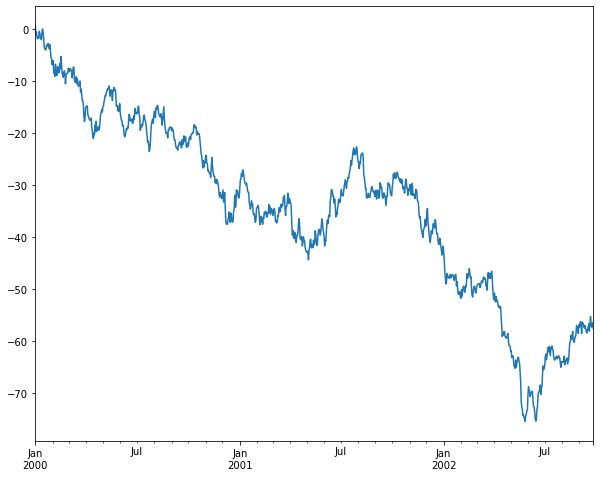

In [185]:
ts.plot()

---
Метод [plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) удобен для построения всех столбцов с метками:

In [198]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

In [199]:
df.head()

,A,B,C,D
2000-01-01,0.451426,-0.752268,0.493068,0.261545
2000-01-02,0.536377,-0.360030,0.139628,0.282377
2000-01-03,0.309418,0.143976,-1.198920,-0.082014
2000-01-04,-1.618722,0.841400,1.064535,0.122196
2000-01-05,0.028089,-0.073193,1.242626,-1.422817


In [200]:
df = df.cumsum()

In [201]:
df.head()

,A,B,C,D
2000-01-01,0.451426,-0.752268,0.493068,0.261545
2000-01-02,0.987803,-1.112298,0.632696,0.543922
2000-01-03,1.297221,-0.968322,-0.566224,0.461907
2000-01-04,-0.321502,-0.126922,0.498311,0.584103
2000-01-05,-0.293413,-0.200115,1.740937,-0.838713


<Figure size 720x576 with 0 Axes>

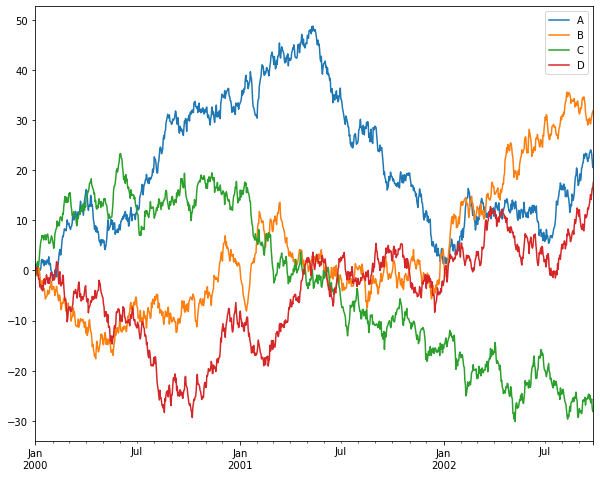

In [202]:
plt.figure()

df.plot()

plt.legend(loc='best')

---
>Подробнее см. [Plotting](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization)

---

## Запись в файл / чтение из файла
---


In [203]:
import pandas as pd

---
### CSV
---

[Запись в csv файл](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-store-in-csv):

In [204]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

In [207]:
df

,A,B,C,D
2000-01-01,0.565075,-0.098418,0.904171,0.871197
2000-01-02,-0.958005,1.248514,0.949375,0.337624
2000-01-03,-0.794615,0.568403,0.355923,0.924305
2000-01-04,0.046233,1.683782,-1.460071,-1.426726
2000-01-05,-0.277970,0.969919,0.555096,1.804755
...,...,...,...,...
2002-09-22,-2.438422,-0.934992,-1.818734,-1.332493
2002-09-23,-0.752713,-0.607148,0.394980,-2.171243
2002-09-24,0.370472,0.199367,-1.075277,0.206021
2002-09-25,-0.329802,0.241016,-1.916048,-0.131596


In [205]:
df.to_csv("foo.csv")

---
[Чтение из csv файла](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table)

In [206]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.565075,-0.098418,0.904171,0.871197
1,2000-01-02,-0.958005,1.248514,0.949375,0.337624
2,2000-01-03,-0.794615,0.568403,0.355923,0.924305
3,2000-01-04,0.046233,1.683782,-1.460071,-1.426726
4,2000-01-05,-0.277970,0.969919,0.555096,1.804755
...,...,...,...,...,...
995,2002-09-22,-2.438422,-0.934992,-1.818734,-1.332493
996,2002-09-23,-0.752713,-0.607148,0.394980,-2.171243
997,2002-09-24,0.370472,0.199367,-1.075277,0.206021
998,2002-09-25,-0.329802,0.241016,-1.916048,-0.131596


---
Сохранение индекса:

In [221]:
df.to_csv("foo.csv")

In [222]:
pd.read_csv("foo.csv", index_col=[0])

,A,B,C,D
2000-01-01,0.565075,-0.098418,0.904171,0.871197
2000-01-02,-0.958005,1.248514,0.949375,0.337624
2000-01-03,-0.794615,0.568403,0.355923,0.924305
2000-01-04,0.046233,1.683782,-1.460071,-1.426726
2000-01-05,-0.277970,0.969919,0.555096,1.804755
...,...,...,...,...
2002-09-22,-2.438422,-0.934992,-1.818734,-1.332493
2002-09-23,-0.752713,-0.607148,0.394980,-2.171243
2002-09-24,0.370472,0.199367,-1.075277,0.206021
2002-09-25,-0.329802,0.241016,-1.916048,-0.131596


---
### HDF5
---

Чтение и запись в [HDFStores](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-hdf5)

---
Запись в HDF5 Store:

In [223]:
df.to_hdf("foo.h5", "df")

---
Чтение из HDF5 Store:

In [224]:
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,0.565075,-0.098418,0.904171,0.871197
2000-01-02,-0.958005,1.248514,0.949375,0.337624
2000-01-03,-0.794615,0.568403,0.355923,0.924305
2000-01-04,0.046233,1.683782,-1.460071,-1.426726
2000-01-05,-0.277970,0.969919,0.555096,1.804755
...,...,...,...,...
2002-09-22,-2.438422,-0.934992,-1.818734,-1.332493
2002-09-23,-0.752713,-0.607148,0.394980,-2.171243
2002-09-24,0.370472,0.199367,-1.075277,0.206021
2002-09-25,-0.329802,0.241016,-1.916048,-0.131596


---
### Excel
---

Чтение и запись в [MS Excel](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel)

---
Запись в excel файл:

In [227]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

---
Чтение из excel файла:

In [228]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.565075,-0.098418,0.904171,0.871197
1,2000-01-02,-0.958005,1.248514,0.949375,0.337624
2,2000-01-03,-0.794615,0.568403,0.355923,0.924305
3,2000-01-04,0.046233,1.683782,-1.460071,-1.426726
4,2000-01-05,-0.277970,0.969919,0.555096,1.804755
...,...,...,...,...,...
995,2002-09-22,-2.438422,-0.934992,-1.818734,-1.332493
996,2002-09-23,-0.752713,-0.607148,0.394980,-2.171243
997,2002-09-24,0.370472,0.199367,-1.075277,0.206021
998,2002-09-25,-0.329802,0.241016,-1.916048,-0.131596
